<img src = "img/BB.png"/>

<img src = "img/RSI-moving-up.png"/>

### RSI (Releative strenth index)
- RSI = 100 – 100 / (1 + RS*)
- RS * = Avg of x days daily gain / Avg of x days daily loss 
- The gain is calculated on daily basis by taking price difference and considering positive change
- The loss is calculated on daily basis by taking price difference and considering negative change without sign

- RS* = average of gain / average of loss
    - gain >= 0
    - loss >= 0
    - average of gain >= 0
    - average of loss >= 0
    
    
- 100/(1 + RS*)
- (1 + RS*) 

    
- RSI = 100 - 100/(1 + RS*)
    - between 0 to 100 and center line can be 50
    

In [ ]:
gain > 0
loss > 0


RS = avg gain / loss
gain = 0
RS = 0
RSI = 0
RSI = 100 


### RSI Development

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from mod_my_utils.read_write_data import *

In [4]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [5]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [6]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [8]:
# symbols = ["HDFC", 'RELIANCE', 'TCS', 'HINDUNILVR', 'INFY', 'HDFC', 'BHARTIARTL', 'ITC', 'ASIANPAINT', 'NESTLEIND', 'HCLTECH', 'SBI', 'SBIN']

In [9]:
# symbol = symbols[0]
# data_source = "yahoo"
# # MM/DD/YYYY
# start_date = "1/1/2010"
# end_date = "1/1/2015"
# print(start_date)
# print(end_date)
# print(symbol)


1/1/2010
1/1/2015
HDFC


In [10]:
# stock_data = get_price_yahoo(symbol=symbol, data_source=data_source, start_date= start_date, end_date= end_date )

stock name HDFC


In [11]:
data = stock_data[["Adj Close"]].copy()
data.columns = ["price"]
data.head(5)

,price
Date,
2010-01-04,442.267761
2010-01-05,443.772614
2010-01-06,445.906067
2010-01-07,437.604248
2010-01-08,429.980499


In [7]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


In [ ]:
- date
- price
- change
- gain
- loss
- avg gain with moving window
- avg loss with moving window
- RS
- RSI

In [8]:
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### RSI computation

In [12]:
data['change'] = data['price'].diff(periods=1)
data.head()

,price,change
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,0.122088
2007-12-05,23.839335,0.731244
2007-12-06,24.411582,0.572247
2007-12-07,24.970258,0.558676


In [13]:
data.head(20)

,price,change
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,0.122088
2007-12-05,23.839335,0.731244
2007-12-06,24.411582,0.572247
2007-12-07,24.970258,0.558676
2007-12-10,24.958692,-0.011566
2007-12-11,24.230069,-0.728623
2007-12-12,24.528170,0.298101
2007-12-13,24.652829,0.124659


In [8]:
data['gain'] = data['change']
data.head()

,price,change,gain
Date,,,
2007-12-03,22.986003,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088
2007-12-05,23.839335,0.731244,0.731244
2007-12-06,24.411582,0.572247,0.572247
2007-12-07,24.970258,0.558676,0.558676


In [9]:
data.loc[data['gain'] < 0, ['gain']] = 0.0

In [10]:
data.head(20)

,price,change,gain
Date,,,
2007-12-03,22.986003,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088
2007-12-05,23.839335,0.731244,0.731244
2007-12-06,24.411582,0.572247,0.572247
2007-12-07,24.970258,0.558676,0.558676
2007-12-10,24.958692,-0.011566,0.000000
2007-12-11,24.230069,-0.728623,0.000000
2007-12-12,24.528170,0.298101,0.298101
2007-12-13,24.652829,0.124659,0.124659


In [15]:
# gain
data['gain'] = data['change']
data.loc[data['gain'] < 0, ['gain']] = 0.0
data.head(10)

,price,change,gain
Date,,,
2007-12-03,22.986003,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088
2007-12-05,23.839335,0.731244,0.731244
2007-12-06,24.411582,0.572247,0.572247
2007-12-07,24.970258,0.558676,0.558676
2007-12-10,24.958692,-0.011566,0.000000
2007-12-11,24.230069,-0.728623,0.000000
2007-12-12,24.528170,0.298101,0.298101
2007-12-13,24.652829,0.124659,0.124659


In [16]:
# loss
data['loss'] = data['change']
data.loc[data['loss'] > 0, ['loss']] = 0.0
data['loss'] = abs(data['loss'])
data.head()

,price,change,gain,loss
Date,,,,
2007-12-03,22.986003,NaN,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088,0.0
2007-12-05,23.839335,0.731244,0.731244,0.0
2007-12-06,24.411582,0.572247,0.572247,0.0
2007-12-07,24.970258,0.558676,0.558676,0.0


In [17]:
data.head(20)

,price,change,gain,loss
Date,,,,
2007-12-03,22.986003,NaN,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088,0.000000
2007-12-05,23.839335,0.731244,0.731244,0.000000
2007-12-06,24.411582,0.572247,0.572247,0.000000
2007-12-07,24.970258,0.558676,0.558676,0.000000
2007-12-10,24.958692,-0.011566,0.000000,0.011566
2007-12-11,24.230069,-0.728623,0.000000,0.728623
2007-12-12,24.528170,0.298101,0.298101,0.000000
2007-12-13,24.652829,0.124659,0.124659,0.000000


In [18]:
period = 14

In [24]:
data['avg_gain'] = data['gain'].rolling(window = period, min_periods=4).mean()

In [25]:
data['avg_loss'] = data['loss'].rolling(window= period, min_periods=4).mean()

In [26]:
data.head(20)

,price,change,gain,loss,avg_gain,avg_loss
Date,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088,0.000000,NaN,NaN
2007-12-05,23.839335,0.731244,0.731244,0.000000,NaN,NaN
2007-12-06,24.411582,0.572247,0.572247,0.000000,NaN,NaN
2007-12-07,24.970258,0.558676,0.558676,0.000000,0.496064,0.000000
2007-12-10,24.958692,-0.011566,0.000000,0.011566,0.396851,0.002313
2007-12-11,24.230069,-0.728623,0.000000,0.728623,0.330709,0.123365
2007-12-12,24.528170,0.298101,0.298101,0.000000,0.326051,0.105741
2007-12-13,24.652829,0.124659,0.124659,0.000000,0.300877,0.092524


In [23]:
data.tail(20)

,price,change,gain,loss,avg_gain,avg_loss
Date,,,,,,
2017-11-02,168.11,1.22,1.22,0.00,1.318214,0.523929
2017-11-03,172.50,4.39,4.39,0.00,1.425357,0.523929
2017-11-06,174.25,1.75,1.75,0.00,1.508214,0.523929
2017-11-07,174.81,0.56,0.56,0.00,1.548214,0.473214
2017-11-09,175.88,1.07,1.07,0.00,1.624643,0.203214
2017-11-10,174.67,-1.21,0.00,1.21,1.611786,0.289643
2017-11-13,173.97,-0.70,0.00,0.70,1.611071,0.339643
2017-11-14,171.34,-2.63,0.00,2.63,1.544643,0.527500
2017-11-15,169.08,-2.26,0.00,2.26,1.544643,0.639286


In [40]:
data['rs'] = data['avg_gain'] / (data['avg_loss'] + 0.000005)
data.head(20)

,price,change,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088,0.000000,NaN,NaN,NaN,NaN
2007-12-05,23.839335,0.731244,0.731244,0.000000,NaN,NaN,NaN,NaN
2007-12-06,24.411582,0.572247,0.572247,0.000000,NaN,NaN,NaN,NaN
2007-12-07,24.970258,0.558676,0.558676,0.000000,0.496064,0.000000,99212.759866,100.000000
2007-12-10,24.958692,-0.011566,0.000000,0.011566,0.396851,0.002313,171.185545,99.420476
2007-12-11,24.230069,-0.728623,0.000000,0.728623,0.330709,0.123365,2.680633,72.831563
2007-12-12,24.528170,0.298101,0.298101,0.000000,0.326051,0.105741,3.083332,75.511072
2007-12-13,24.652829,0.124659,0.124659,0.000000,0.300877,0.092524,3.251717,76.481061


In [41]:
data['rsi'] = 100 - 100 / (1 + data['rs'])
data.head(20)

,price,change,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-04,23.108091,0.122088,0.122088,0.000000,NaN,NaN,NaN,NaN
2007-12-05,23.839335,0.731244,0.731244,0.000000,NaN,NaN,NaN,NaN
2007-12-06,24.411582,0.572247,0.572247,0.000000,NaN,NaN,NaN,NaN
2007-12-07,24.970258,0.558676,0.558676,0.000000,0.496064,0.000000,99212.759866,99.998992
2007-12-10,24.958692,-0.011566,0.000000,0.011566,0.396851,0.002313,171.185545,99.419231
2007-12-11,24.230069,-0.728623,0.000000,0.728623,0.330709,0.123365,2.680633,72.830761
2007-12-12,24.528170,0.298101,0.298101,0.000000,0.326051,0.105741,3.083332,75.510197
2007-12-13,24.652829,0.124659,0.124659,0.000000,0.300877,0.092524,3.251717,76.480089


In [38]:
def get_rsi(data, period = 14):
    """
    RSI indicator value calculation
    Input: 
    data frame with price of the stock
    period: moving window size for avg gain and avg loss calculation 
    Output: 
    Price and RSI values
    """
    rsi_data = pd.DataFrame(index = data.index)
    rsi_data['price'] = data['price']
    # change
    rsi_data['change'] = rsi_data['price'].diff(periods = 1)
    # gain
    rsi_data['gain'] = rsi_data['change']
    rsi_data.loc[rsi_data['gain'] < 0, ['gain']] = 0.0
    # loss
    rsi_data['loss'] = rsi_data['change']
    rsi_data.loc[rsi_data['loss'] > 0, ['loss']] = 0.0
    rsi_data['loss'] = abs(rsi_data['loss'])
    # average gain
    rsi_data['avg_gain'] = rsi_data['gain'].rolling(window = period).mean()
    # average loss
    rsi_data['avg_loss'] = rsi_data['loss'].rolling(window= period).mean()
    # rs
    rsi_data['rs'] = rsi_data['avg_gain'] / (rsi_data['avg_loss'] + 0.00005)
    # rsi
    rsi_data['rsi'] = 100 - 100 / (1 + rsi_data['rs'])
    return rsi_data[['price', 'rsi']]

In [39]:
rsi_values = get_rsi(data, period)
rsi_values.head(20)

,price,rsi
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN
2007-12-10,24.958692,NaN
2007-12-11,24.230069,NaN
2007-12-12,24.528170,NaN
2007-12-13,24.652829,NaN


<AxesSubplot:xlabel='Date'>

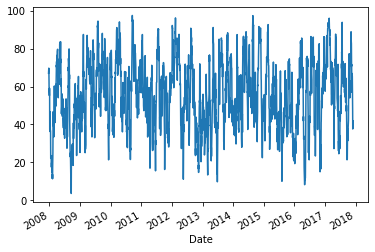

In [37]:
rsi_values.rsi.plot()

In [ ]:
### RSI Signal generation


In [51]:
rsi = get_rsi(data, 200)

In [52]:
rsi.head()

,price,rsi
Date,,
2007-12-03,22.986003,NaN
2007-12-04,23.108091,NaN
2007-12-05,23.839335,NaN
2007-12-06,24.411582,NaN
2007-12-07,24.970258,NaN


<AxesSubplot:xlabel='Date'>

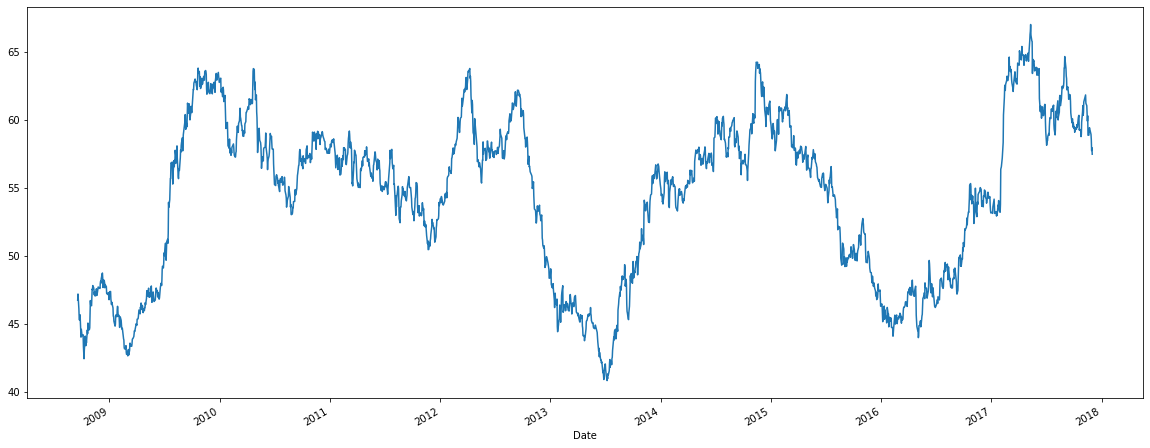

In [54]:
rsi['rsi'].plot(figsize=(20, 8))

### Buy and Sell Signals

In [ ]:
50 center line

up = [60, 70, 75, 80]
down = [40, 30, 25, 20]

In [62]:
buy_threshold = 45
sell_threshold = 55

In [63]:
signals = pd.DataFrame(index=rsi.index)
signals['price'] = rsi['price'] 
signals['rsi'] = rsi['rsi']
signals['buy']= 0.0
signals['sell']= 0.0
signals['buy'] = np.where(signals['rsi'] < buy_threshold, -1.0, 0.0)
signals['sell'] = np.where(signals['rsi'] > sell_threshold, 1.0, 0.0)
signals['buy'] = signals['buy'].diff()
signals['sell'] = signals['sell'].diff()
signals.loc[signals['buy']==-1.0,['buy']] = 0 
signals.loc[signals['sell']== 1.0,['sell']] = 0 
signals['buy_sell'] = signals['buy'] + signals['sell']

In [25]:
signals = pd.DataFrame(index=rsi.index)
signals['price'] = rsi['price'] 
signals['rsi'] = rsi['rsi']
signals['buy']= 0.0
signals['sell']= 0.0
signals['buy'] = np.where(signals['rsi'] < buy_threshold, -1.0, 0.0)
signals['sell'] = np.where(signals['rsi'] > sell_threshold, 1.0, 0.0)
signals['buy'] = signals['buy'].diff()
signals['sell'] = signals['sell'].diff()
signals.loc[signals['buy']==-1.0,['buy']] = 0 
signals.loc[signals['sell']== 1.0,['sell']] = 0 
signals['buy_sell'] = signals['buy'] + signals['sell']

<AxesSubplot:xlabel='Date'>

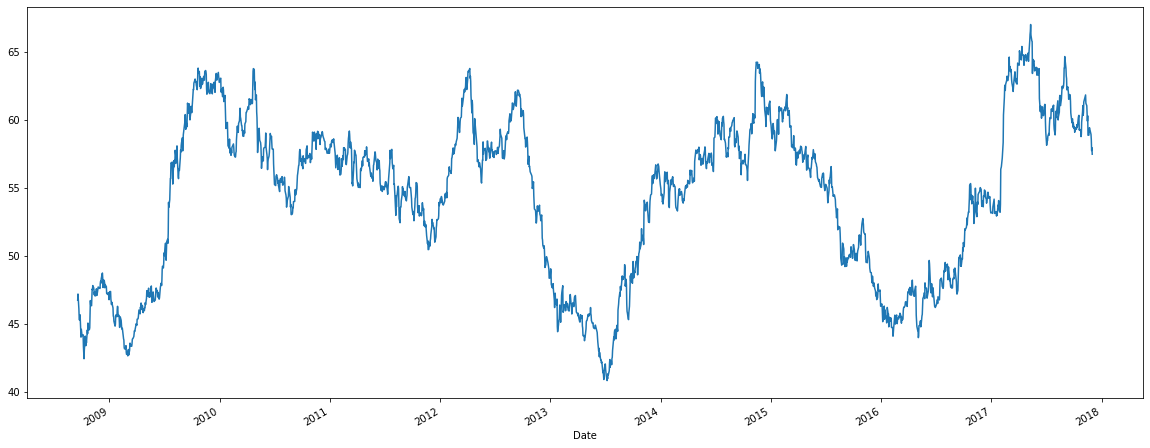

In [61]:
rsi['rsi'].plot(figsize=(20, 8))

<AxesSubplot:xlabel='Date'>

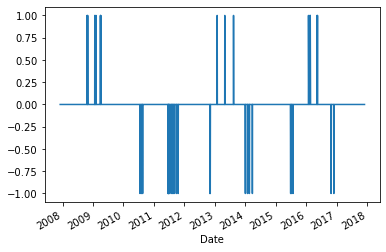

In [64]:
signals.buy_sell.plot()

In [65]:
def get_rsi_signal(rsi, buy_threshold = 20, sell_threshold = 80):
    """
    RSI buy sell signal calculation
    Input:
    data: data frame with rsi indicator values
    buy_threshold: threshold for getting buy signal
    sell_threshold: threshold for getting sell signal
    Output: data frame with buy and sell signal
    """
    signals = pd.DataFrame(index=rsi.index)
    signals['price'] = rsi['price'] 
    signals['rsi'] = rsi['rsi']
    signals['buy']= 0.0
    signals['sell']= 0.0
    signals['buy'] = np.where(signals['rsi'] < buy_threshold, -1.0, 0.0)
    signals['sell'] = np.where(signals['rsi'] > sell_threshold, 1.0, 0.0)
    signals['buy'] = signals['buy'].diff()
    signals['sell'] = signals['sell'].diff()
    signals.loc[signals['buy']==-1.0,['buy']]=0 
    signals.loc[signals['sell']== 1.0,['sell']]=0 
    signals['buy_sell'] = signals['buy'] + signals['sell']
    return signals[['price','buy_sell']]

In [75]:
signals = get_rsi_signal(rsi, buy_threshold = 40, sell_threshold= 60)

<AxesSubplot:xlabel='Date'>

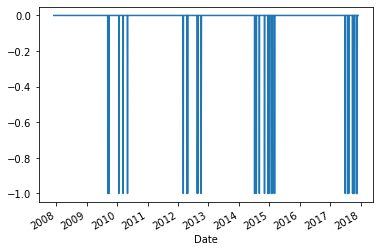

In [76]:
signals['buy_sell'].plot()

### Plot RSI buy sell signal

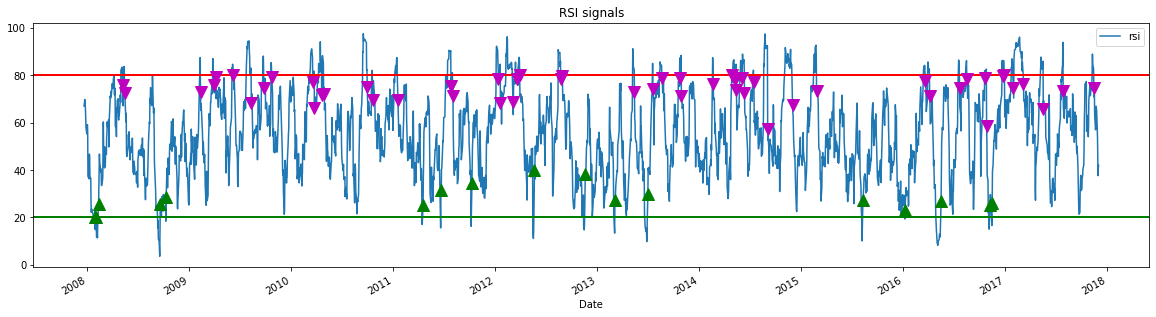

In [30]:
    graph = plt.figure(figsize=(20,5))
    ax2 = graph.add_subplot(1,1,1)
    rsi[['rsi']].plot(ax=ax2,title = 'RSI signals')
    ax2.axhline(y= 20, color = "g", lw = 2.)
    ax2.axhline(y= 80, color = "r", lw = 2.)
    ax2.plot(signals.loc[signals.buy_sell == 1].index, rsi.rsi[signals.buy_sell == 1],"^", markersize = 12, color ='g')
    ax2.plot(signals.loc[signals.buy_sell == -1].index, rsi.rsi[signals.buy_sell == -1],"v", markersize = 12, color ='m')
    # plt.show()
    plt.show()

In [31]:
def plot_rsi_buy_sell(rsi, signals, buy_threshold = 20, sell_threshold = 80):
    """
    Plot rsi with buy and sell signal
    """
    graph = plt.figure(figsize=(20,5))
    ax2 = graph.add_subplot(1,1,1)
    rsi[['rsi']].plot(ax=ax2,title = 'RSI signals')
    ax2.axhline(y= buy_threshold, color = "g", lw = 2.)
    ax2.axhline(y= sell_threshold, color = "r", lw = 2.)
    ax2.plot(signals.loc[signals.buy_sell == 1].index, rsi.rsi[signals.buy_sell == 1],"^", markersize = 12, color ='g')
    ax2.plot(signals.loc[signals.buy_sell == -1].index, rsi.rsi[signals.buy_sell == -1],"v", markersize = 12, color ='m')
    # plt.show()
    plt.show()

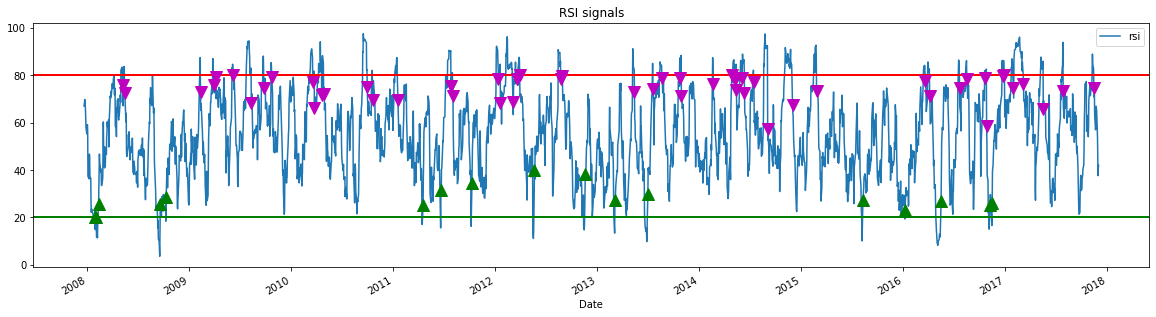

In [32]:
plot_rsi_buy_sell(rsi_values, signals)